In [2]:
# Load General libraries needed for data exploration

import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import itertools
from itertools import chain
import plotly.tools as tls
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve, train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

In [3]:
# Read data
dataset = pd.read_csv('data.csv')


In [4]:
# drop the last column from the data
dataset = dataset.drop(['Unnamed: 32','id'],axis = 1)

# Impute the only categorical column
dataset["diagnosis"].replace(to_replace = dict(M = 1, B = 0), inplace = True)
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [6]:
dataset.shape

(569, 31)

Proportion: 1.68 : 1


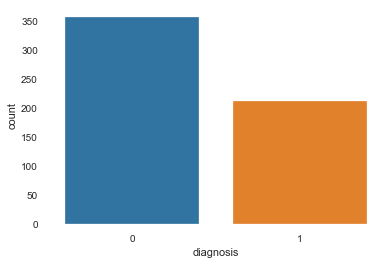

In [7]:
#check the value count of the benign vs malignant cases
target_count = (dataset['diagnosis']).value_counts()
sns.countplot(dataset['diagnosis'])
pd.Series(dataset['diagnosis']).value_counts()
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

The bar graph indicates the ratio of Malignant versus Benign with 0 - Benign and 1 - Malignant

In [8]:
# check for missing values
dataset.isna().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
print(dataset.shape)

(569, 31)


In [105]:

def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = round(corr_r, 2)
    ax = plt.gca()
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize = abs(corr_r) * 80 + 5)

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    ax = plt.gca()
    ax.annotate(p_stars, xy=(0.65, 0.6), xycoords=ax.transAxes,
                color='red', fontsize=70)    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\s

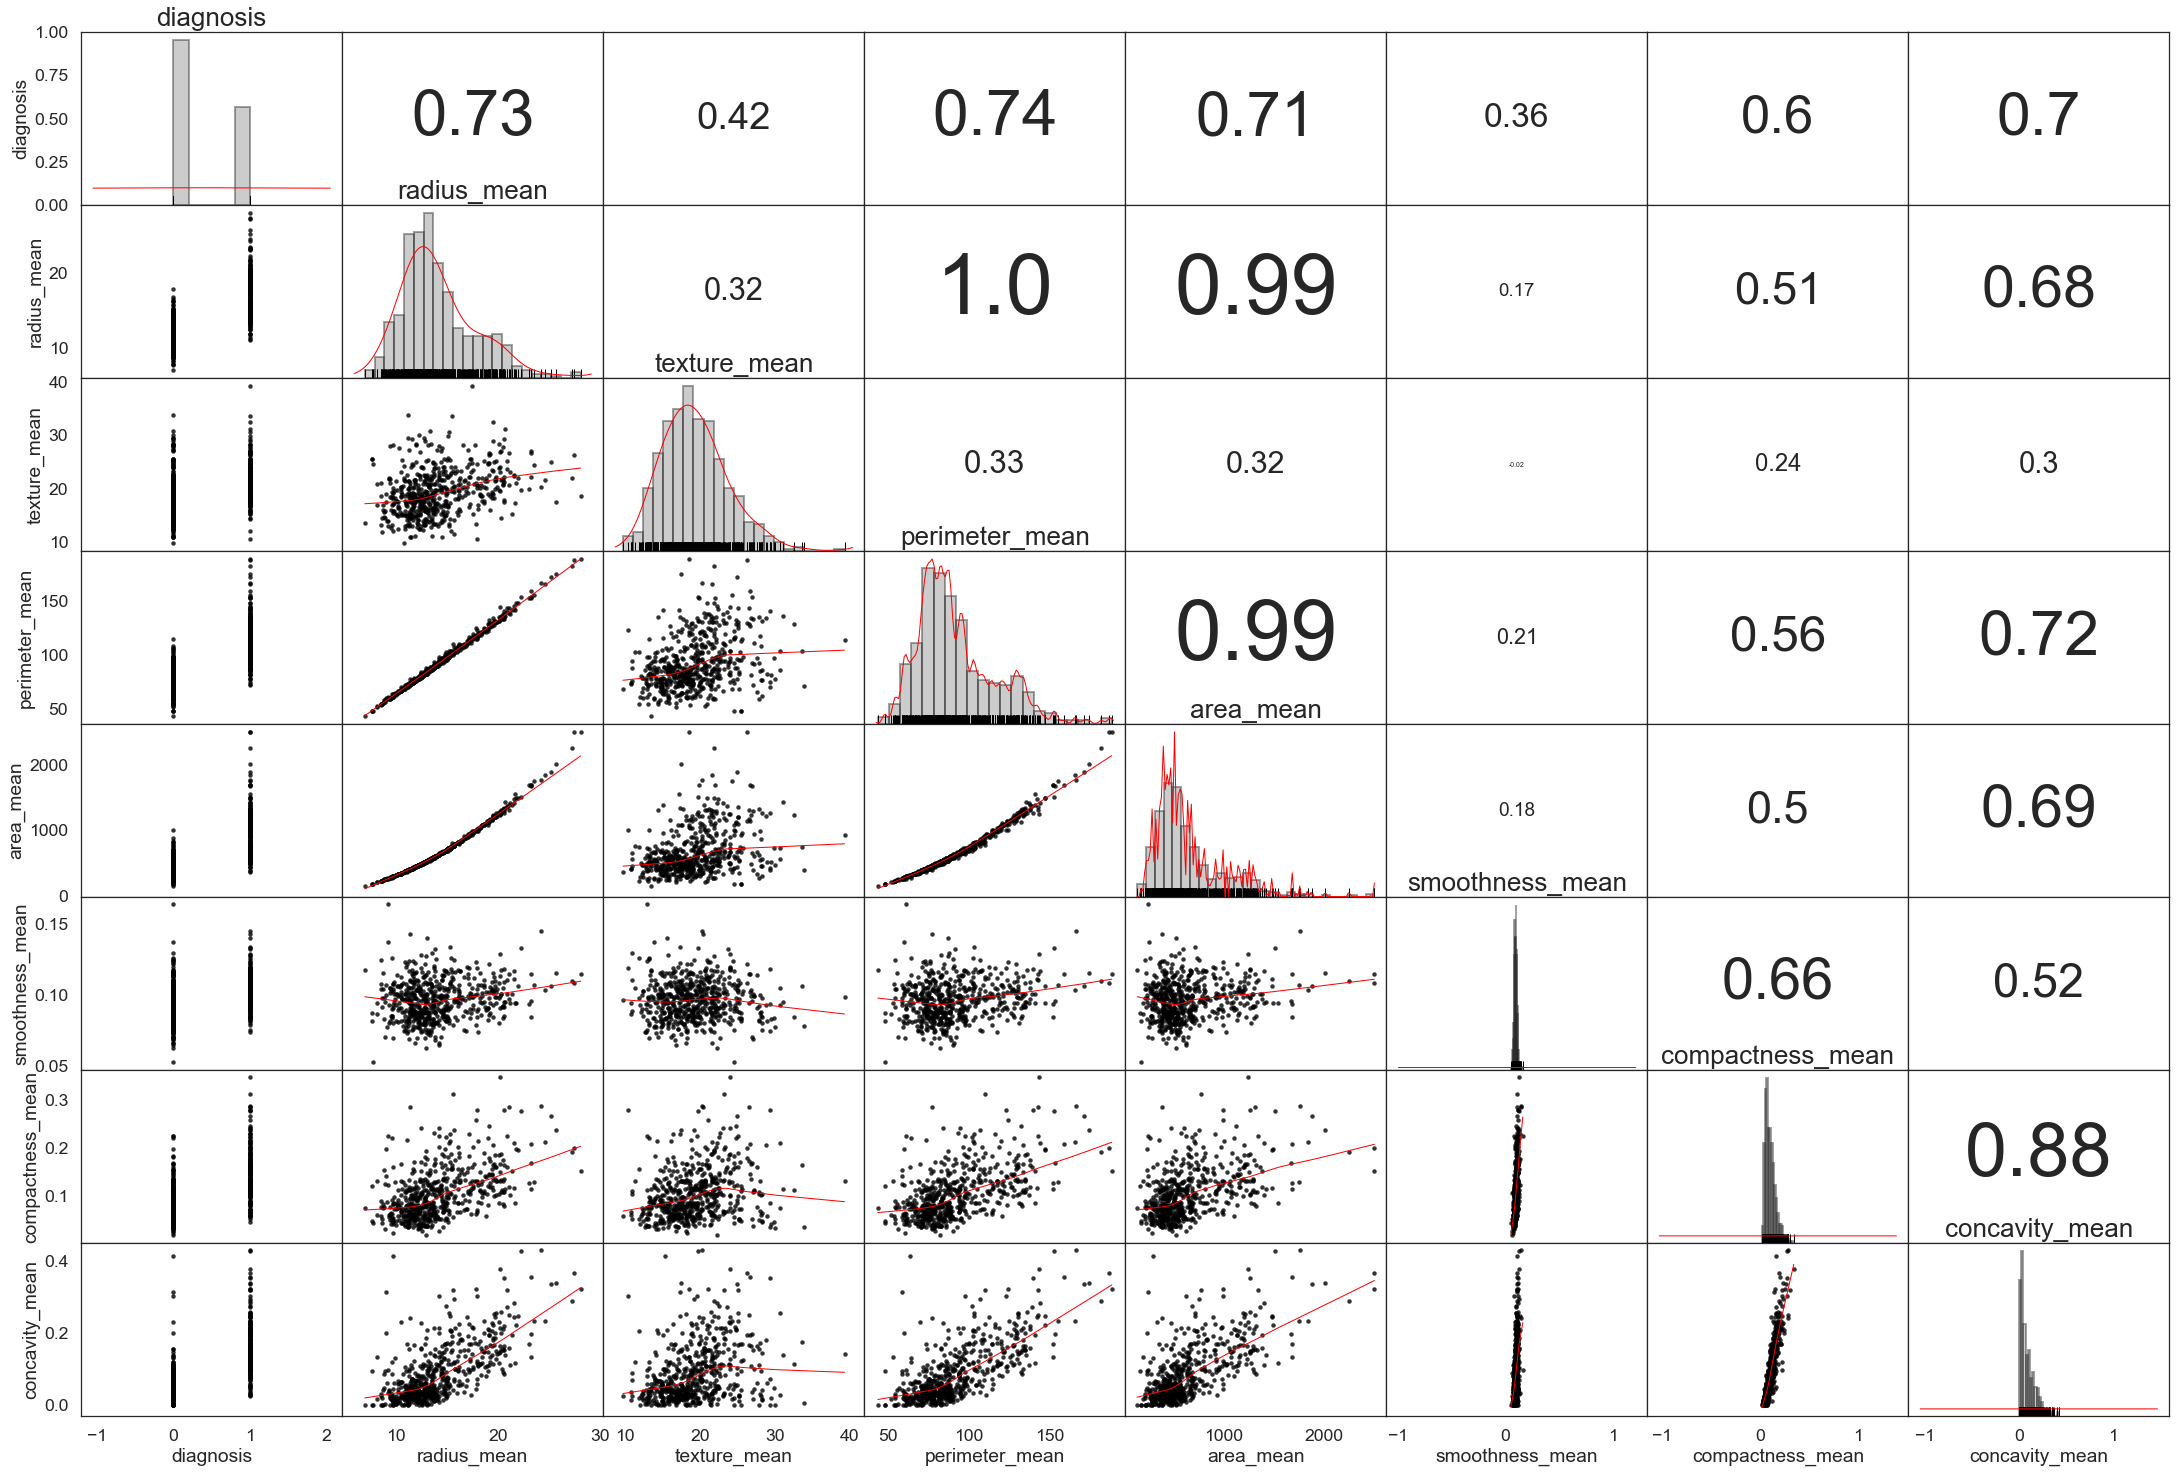

In [106]:
df_density = dataset[['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean',
                      'smoothness_mean','compactness_mean','concavity_mean']]
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_density, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1,'bw':1.5},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
#for ax in g.axes.flatten():
#    ax.set_ylabel('')
#    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df_density.columns):
    ax.set_title(col, y=0.82, fontsize=26)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\s

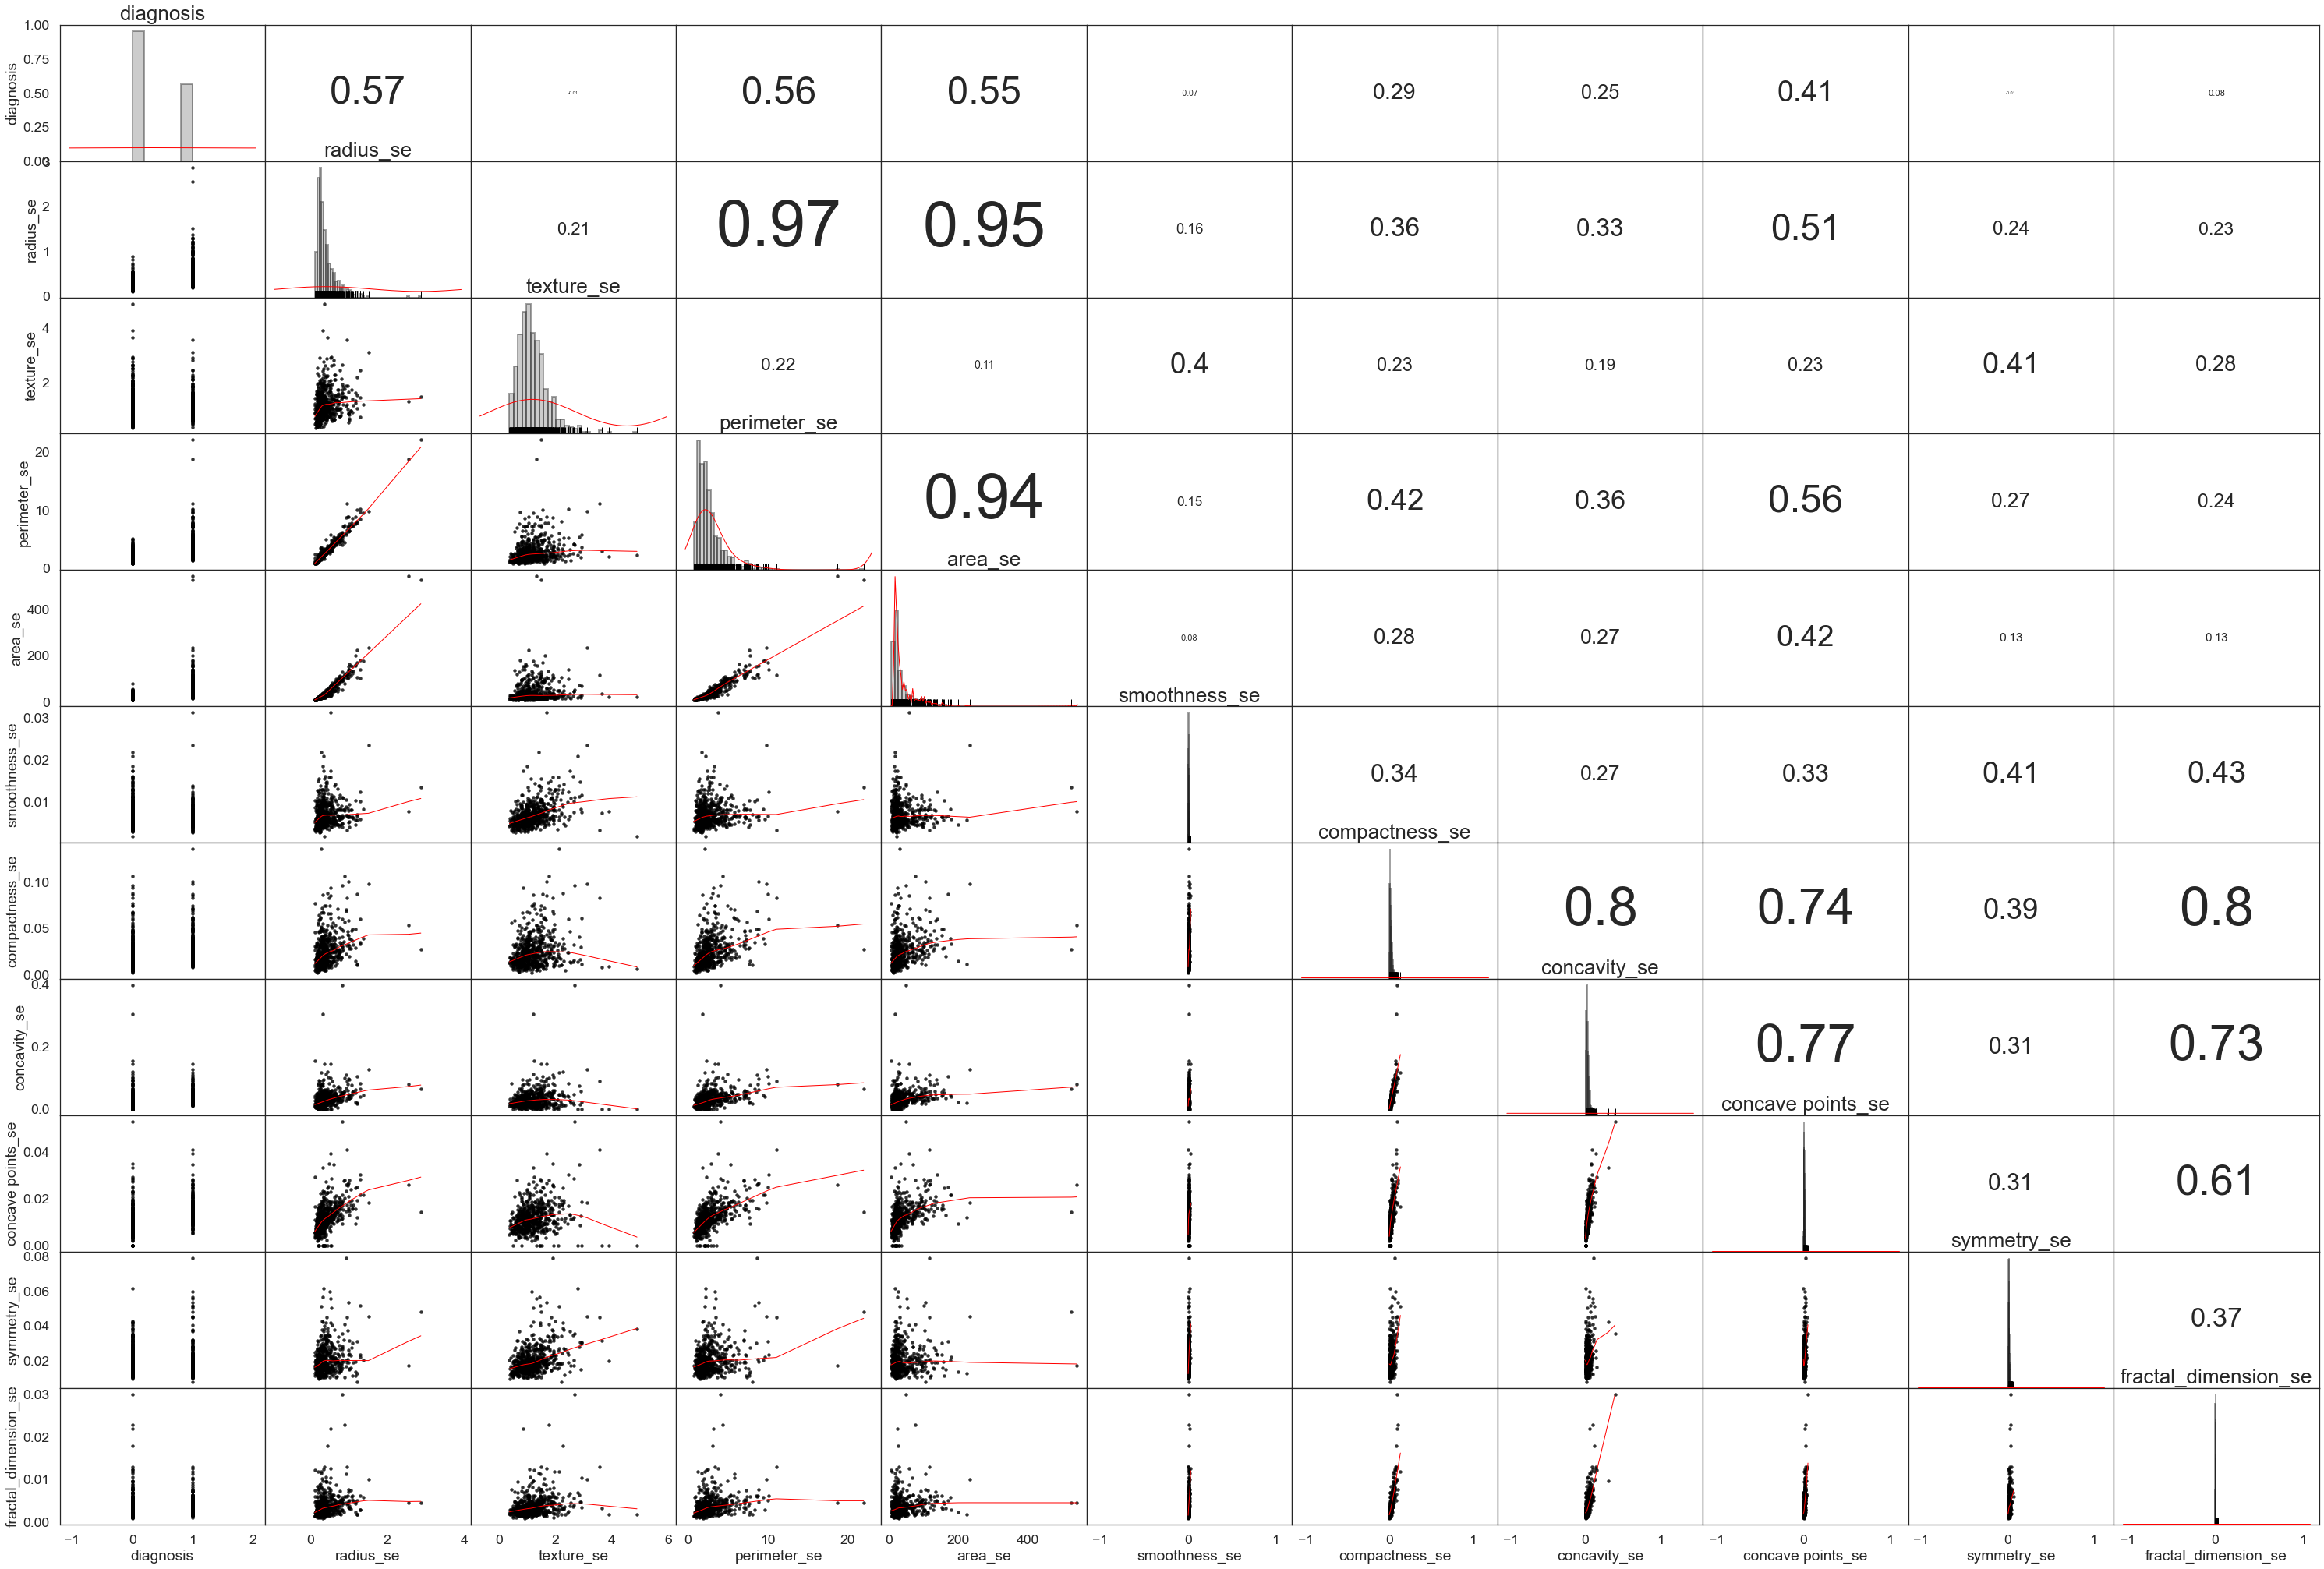

In [107]:
df_density = dataset[['diagnosis','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se',
                      'concavity_se','concave points_se','symmetry_se','fractal_dimension_se']]
sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_density, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1,'bw':1.5},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
#for ax in g.axes.flatten():
#    ax.set_ylabel('')
#    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df_density.columns):
    ax.set_title(col, y=0.82, fontsize=26)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:165: RuntimeWarning:

invalid value encountered in greater_equal

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\s

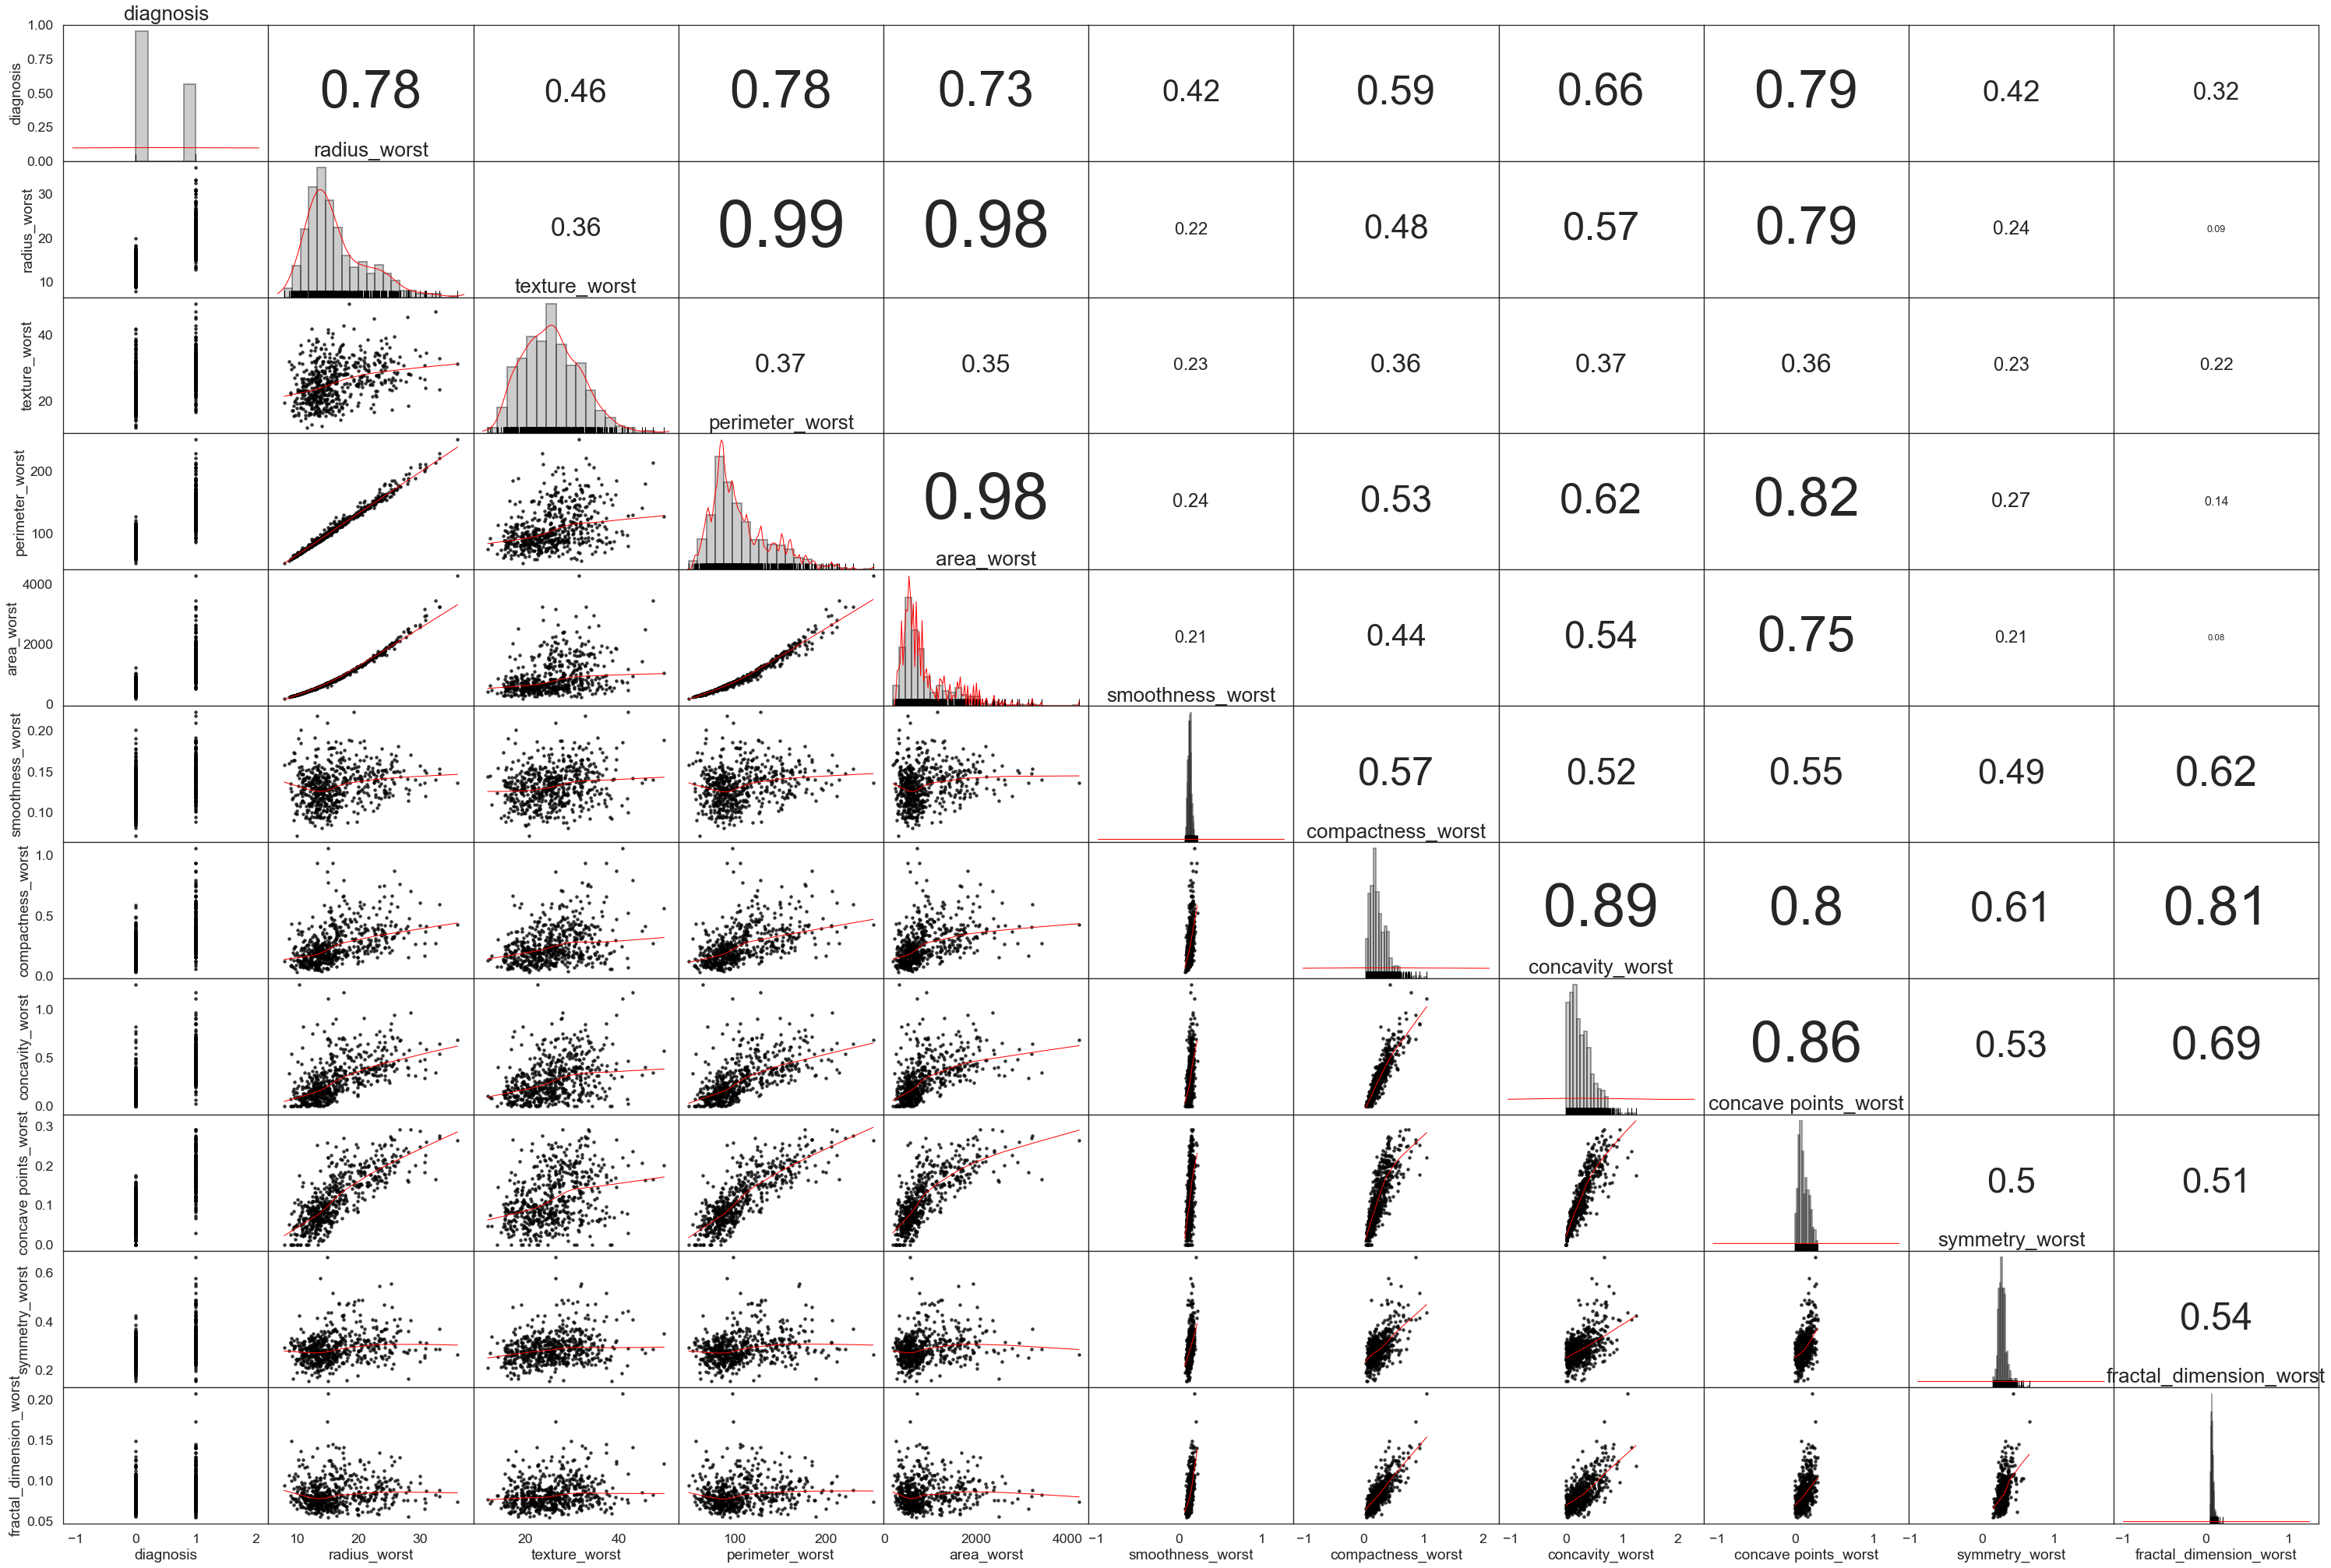

In [108]:
#density plot
sns.set(rc={'figure.figsize':(11.7,8.27)})
df_density = dataset[['diagnosis','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst',
                      'concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst',]]

sns.set(style='white', font_scale=1.6)
g = sns.PairGrid(df_density, aspect=1.5, diag_sharey=False, despine=False)
g.map_lower(sns.regplot, lowess=True, ci=False,
            line_kws={'color': 'red', 'lw': 1},
            scatter_kws={'color': 'black', 's': 20})
g.map_diag(sns.distplot, color='black',
           kde_kws={'color': 'red', 'cut': 0.7, 'lw': 1,'bw':1.5},
           hist_kws={'histtype': 'bar', 'lw': 2,
                     'edgecolor': 'k', 'facecolor':'grey'})
g.map_diag(sns.rugplot, color='black')
g.map_upper(corrdot)
g.map_upper(corrfunc)
g.fig.subplots_adjust(wspace=0, hspace=0)

# Remove axis labels
#for ax in g.axes.flatten():
#    ax.set_ylabel('')
#    ax.set_xlabel('')

# Add titles to the diagonal axes/subplots
for ax, col in zip(np.diag(g.axes), df_density.columns):
    ax.set_title(col, y=0.82, fontsize=26)

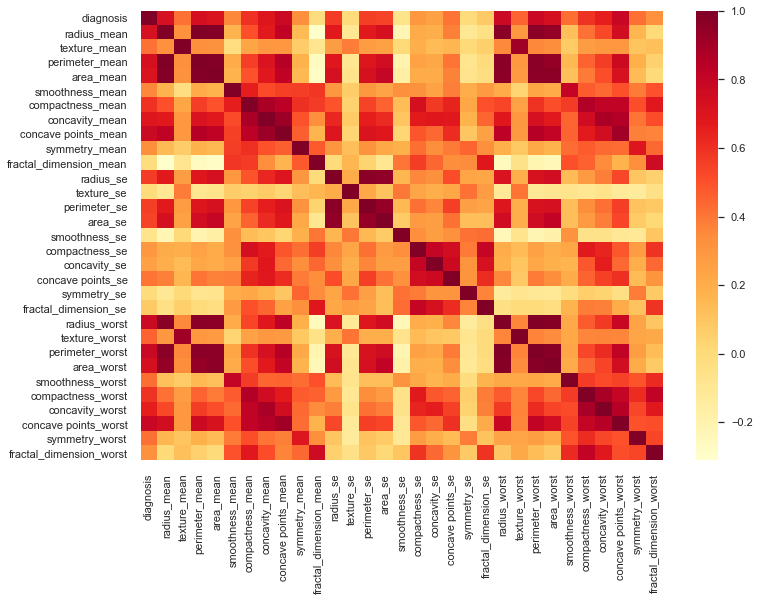

In [10]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
correlation = dataset.corr()
sns.heatmap(correlation, cmap="YlOrRd")

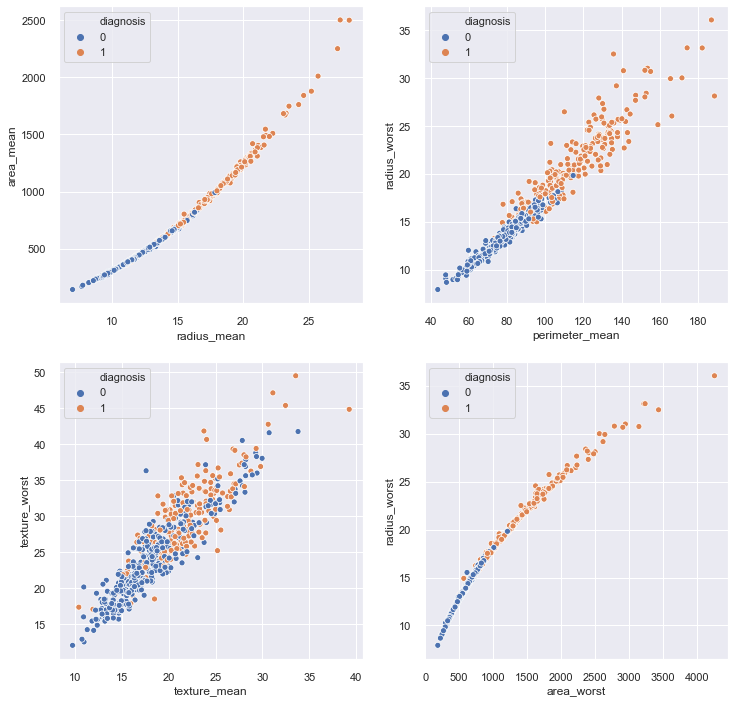

In [11]:
#Positive correlations
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=dataset, x="radius_mean", y="area_mean", hue="diagnosis")
plt.subplot(222)
sns.scatterplot(data=dataset, x="perimeter_mean", y="radius_worst", hue="diagnosis")
plt.subplot(223)
sns.scatterplot(data=dataset, x="texture_mean", y="texture_worst", hue="diagnosis")
plt.subplot(224)
sns.scatterplot(data=dataset, x="area_worst", y="radius_worst", hue="diagnosis")

plt.show()

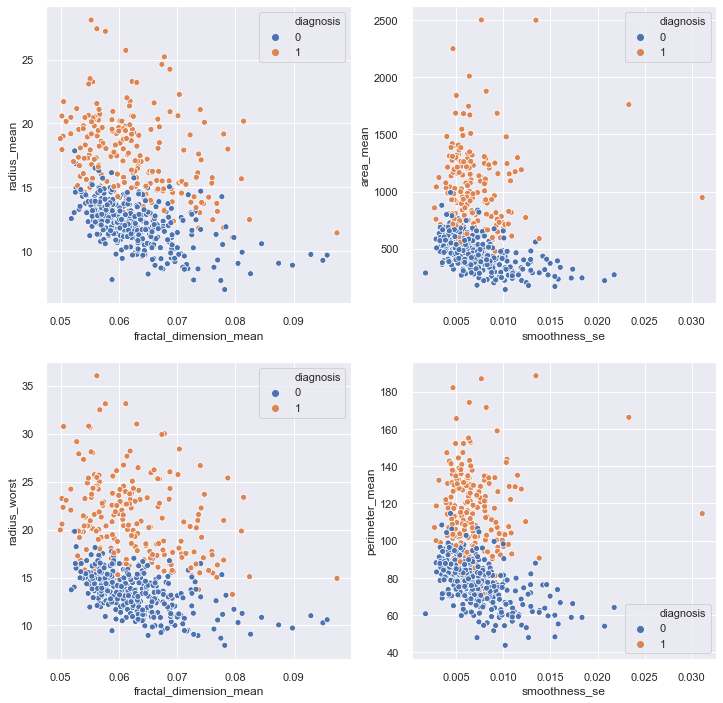

In [12]:
#Negative correlation 
fig = plt.figure(figsize=(12,12))
plt.subplot(221)
sns.scatterplot(data=dataset, x="fractal_dimension_mean", y="radius_mean", hue="diagnosis")

plt.subplot(222)
sns.scatterplot(data=dataset, x="smoothness_se", y="area_mean", hue="diagnosis")

plt.subplot(223)
sns.scatterplot(data=dataset, x="fractal_dimension_mean", y="radius_worst", hue="diagnosis")

plt.subplot(224)
sns.scatterplot(data=dataset, x="smoothness_se", y="perimeter_mean", hue="diagnosis")
plt.show()



In [13]:
dataset.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
y=dataset["diagnosis"]
dataset = dataset.drop(columns = 'diagnosis')

### Confusion matrix

In [16]:
# Show metrics 
def show_evaluation_metrics():
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    print('Accuracy  =     {:.3f}'.format((tp+tn)/(tp+tn+fp+fn)))
    print('Precision =     {:.3f}'.format(tp/(tp+fp)))
    print('Recall    =     {:.3f}'.format(tp/(tp+fn)))
    print('F1_score  =     {:.3f}'.format(2*(((tp/(tp+fp))*(tp/(tp+fn)))/
                                                 ((tp/(tp+fp))+(tp/(tp+fn))))))

### Precision – Recall curve
The proportion of predicted Positives that is actually positive

In [17]:
def plot_precision_recall():
    plt.step(recall, precision, color = 'b', alpha = 0.2,
             where = 'post')
    plt.fill_between(recall, precision, step ='post', alpha = 0.2,
                 color = 'b')

    plt.plot(recall, precision, linewidth=2)
    plt.xlim([0.0,1])
    plt.ylim([0.0,1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show();

### ROC curve
ROC is the ratio of True Positive Rate (TPR) and False Positive Rate (FPR) where TPR is proportion of actual positives correctly classified by the model and FPR is the proportion of false positives classified by the model

In [18]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve', linewidth = 2)
    plt.plot([0,1],[0,1], 'k--', linewidth = 2)
    plt.xlabel('1-Specificity')
    plt.ylabel('Sensitivity')
    plt.title('ROC Curve')
    plt.show();

### Cross validation metrics
Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

In [19]:
# Cross val metric
def cross_val_metrics(model) :
    scores = ['accuracy', 'precision', 'recall']
    for sc in scores:
        scores = cross_val_score(model, dataset, y, cv = 5, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [20]:
#make a copy of the clean dataset
cleaned_dataset = dataset

In [21]:
# Normalization
scaler = StandardScaler()
dataset = scaler.fit_transform(dataset)

In [22]:
# Train_test split
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.30, random_state = random_state)

In [23]:
# Using GridSearchCV in Logistic regression
param_grid = {'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }
log_clf = LogisticRegression(random_state = 42)
CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'accuracy', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  59 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    4.1s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    4.2s finished


The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


Confusion matrix : 
 [[106   2]
 [  1  62]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.982
Precision =     0.969
Recall    =     0.984
F1_score  =     0.976


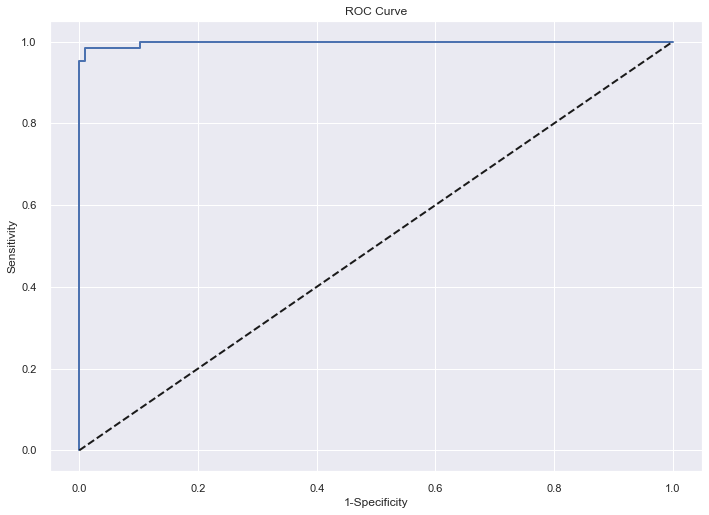

In [24]:
#Using scoring = "accuracy"
CV_log_clf = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf.fit(X_train, y_train)
y_pred = CV_log_clf.predict(X_test)
y_score = CV_log_clf.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
#plot_confusion_matrix(cm, 
#                      classes=class_names, 
#                      title='Logistic Confusion matrix')
print('Confusion matrix : \n',cm)
plt.savefig('6')
plt.show()

show_evaluation_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

### Feature Elimination
Feature selection refers to techniques that select the most relevant parameters (columns) for a dataset. Lesser parameters can allow ML algorithms to run more effectively (less space or time complexity). Too many features (irrelevant) can mislead the algorithm resulting in bad performance.

Confusion matrix : 
 [[106   2]
 [  2  61]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.977
Precision =     0.968
Recall    =     0.968
F1_score  =     0.968


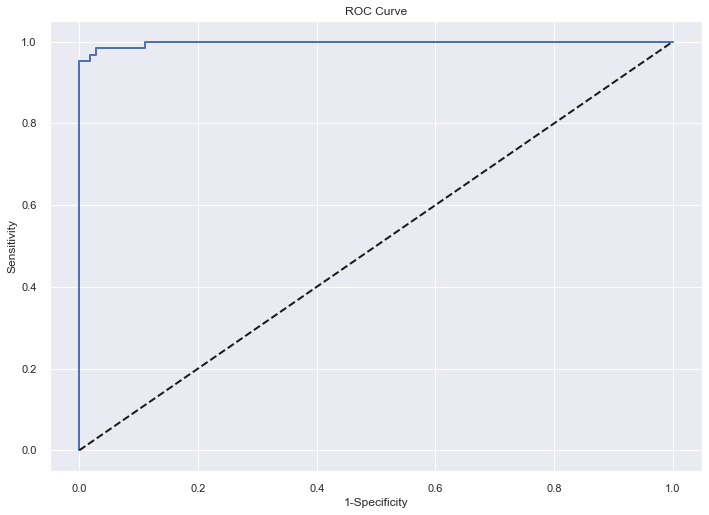

In [25]:
log_clf = LogisticRegression(C = best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(log_clf)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
print('Confusion matrix : \n',cm)
plt.show()

show_evaluation_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()


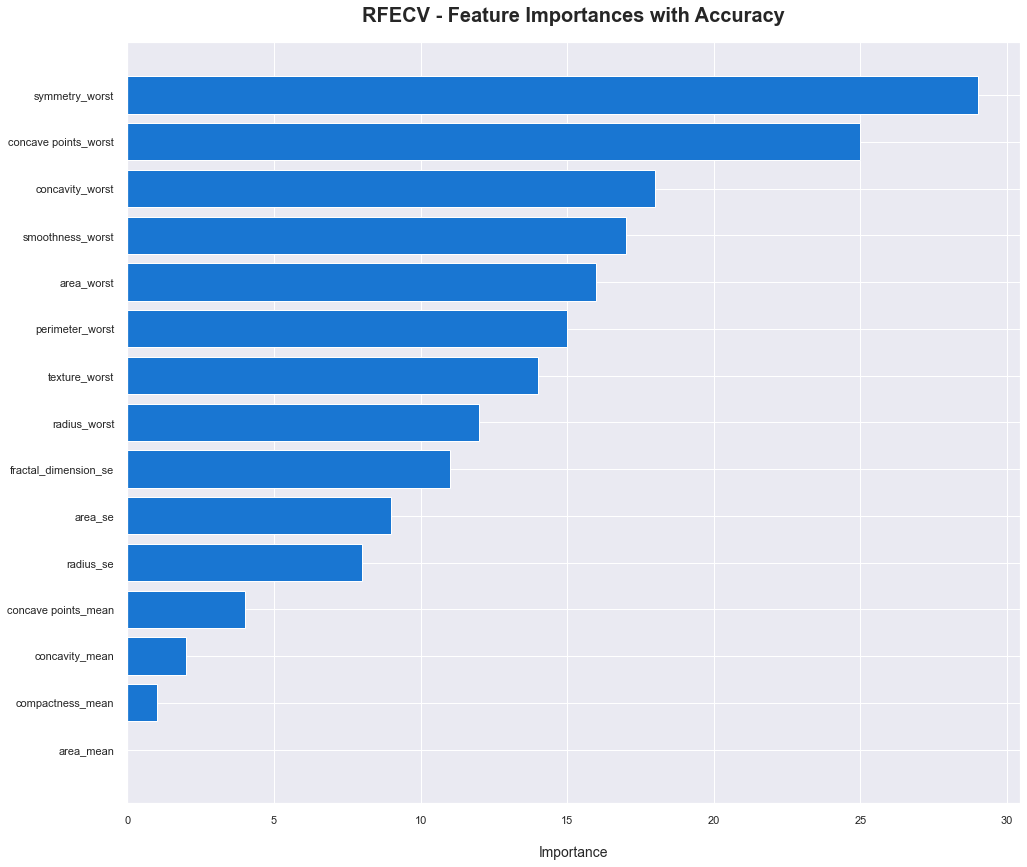

In [26]:
# Feature Importance for Logistic Regression using RFE
dset = pd.DataFrame()
dataset_copy = cleaned_dataset.copy()
cols_of_interest = list(np.where(selector.support_ == False)[0])
dataset_dropped = dataset_copy.drop(dataset_copy.columns[cols_of_interest], axis=1)
dset['attr'] = dataset_dropped.columns
dset['importance'] = list(np.where(selector.ranking_ != 1)[0])
dset = dset.sort_values(by='importance', ascending=True)
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances with Accuracy', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [27]:
#cross validation with folds = 5
cross_val_metrics(CV_log_clf)

[accuracy] : 0.98069 (+/- 0.00654)
[precision] : 0.98582 (+/- 0.01159)
[recall] : 0.96224 (+/- 0.02426)


In [28]:
#cross validation with folds = 5 for model with RFE
cross_val_metrics(selector)

[accuracy] : 0.96664 (+/- 0.01160)
[precision] : 0.97153 (+/- 0.02268)
[recall] : 0.93876 (+/- 0.02403)


In [29]:
# Select optimum threshold
def select_threshold_value(cv_model, X_test):
    threshold_values = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    j = 1
    for i in threshold_values:
        y_score = cv_model.predict_proba(X_test)[:,1] > i
        j += 1
        cm = confusion_matrix(y_test, y_score)

        tp = cm[1,1]
        fn = cm[1,0]
        fp = cm[0,1]
        tn = cm[0,0]

        print('Recall w/ threshold = %s :'%i, (tp/(tp+fn)))

        class_names = [0,1]
        print('Threshold = %s \n'%i)
        print('Confusion matrix : \n',cm)

In [30]:
select_threshold_value(CV_log_clf,X_test)

Recall w/ threshold = 0.1 : 0.9841269841269841
Threshold = 0.1 

Confusion matrix : 
 [[97 11]
 [ 1 62]]
Recall w/ threshold = 0.2 : 0.9841269841269841
Threshold = 0.2 

Confusion matrix : 
 [[100   8]
 [  1  62]]
Recall w/ threshold = 0.3 : 0.9841269841269841
Threshold = 0.3 

Confusion matrix : 
 [[103   5]
 [  1  62]]
Recall w/ threshold = 0.4 : 0.9841269841269841
Threshold = 0.4 

Confusion matrix : 
 [[105   3]
 [  1  62]]
Recall w/ threshold = 0.5 : 0.9841269841269841
Threshold = 0.5 

Confusion matrix : 
 [[106   2]
 [  1  62]]
Recall w/ threshold = 0.6 : 0.9682539682539683
Threshold = 0.6 

Confusion matrix : 
 [[107   1]
 [  2  61]]
Recall w/ threshold = 0.7 : 0.9523809523809523
Threshold = 0.7 

Confusion matrix : 
 [[107   1]
 [  3  60]]
Recall w/ threshold = 0.8 : 0.9523809523809523
Threshold = 0.8 

Confusion matrix : 
 [[108   0]
 [  3  60]]
Recall w/ threshold = 0.9 : 0.9047619047619048
Threshold = 0.9 

Confusion matrix : 
 [[108   0]
 [  6  57]]


In [33]:
# Recall = 98%.
y_score = CV_log_clf.predict_proba(X_test)[:,1] > 0.53
cm = confusion_matrix(y_test, y_score)
class_names = [0,1]
cross_val_metrics(CV_log_clf)

[accuracy] : 0.98069 (+/- 0.00654)
[precision] : 0.98582 (+/- 0.01159)
[recall] : 0.96224 (+/- 0.02426)


In [34]:
# Using GridSearchCV in Logistic regression with Recall 
param_grid = {'penalty' : ['l2','l1'],
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]
             }
log_clf = LogisticRegression(random_state = 42)
CV_log_clf = GridSearchCV(estimator = log_clf, param_grid = param_grid , scoring = 'recall', verbose = 1, n_jobs = -1)
CV_log_clf.fit(X_train, y_train)

best_parameters = CV_log_clf.best_params_
print('The best parameters for using this model is', best_parameters)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


The best parameters for using this model is {'C': 1, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished


Confusion matrix : 
 [[106   2]
 [  1  62]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.982
Precision =     0.969
Recall    =     0.984
F1_score  =     0.976


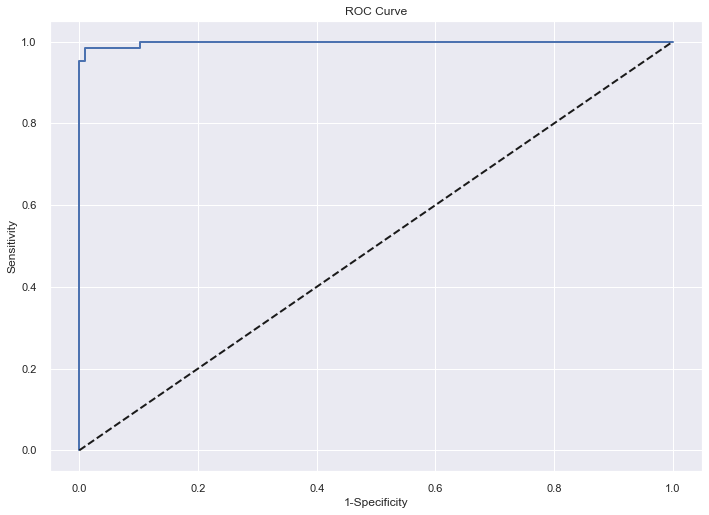

In [35]:
# LR with recall
CV_log_clf_1 = LogisticRegression(C = best_parameters['C'], 
                                penalty = best_parameters['penalty'], 
                                random_state = random_state)

CV_log_clf_1.fit(X_train, y_train)
y_pred = CV_log_clf_1.predict(X_test)
y_score = CV_log_clf_1.decision_function(X_test)

# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
print('Confusion matrix : \n',cm)
plt.savefig('6')
plt.show()

show_evaluation_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

Confusion matrix : 
 [[106   2]
 [  2  61]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.977
Precision =     0.968
Recall    =     0.968
F1_score  =     0.968


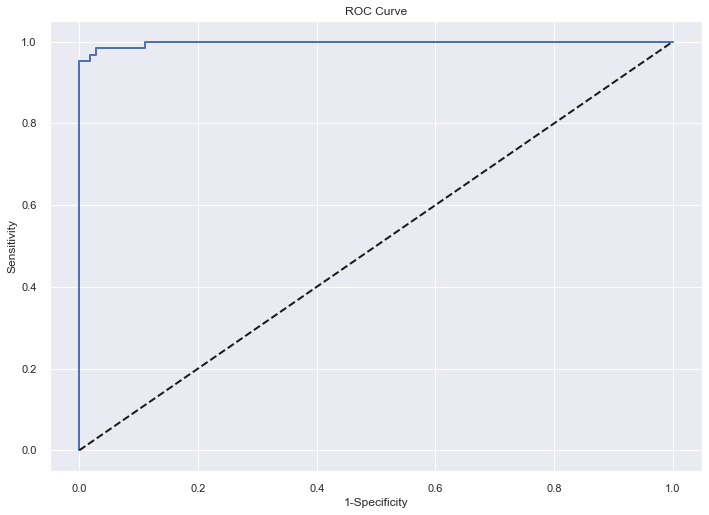

In [36]:
CV_log_clf_2 = LogisticRegression(C =best_parameters['C'], 
                                 penalty = best_parameters['penalty'], 
                                 random_state = random_state)

selector = RFE(CV_log_clf_2)
selector = selector.fit(X_train, y_train)

y_pred = selector.predict(X_test)
y_score = selector.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
print('Confusion matrix : \n',cm)

plt.show()

show_evaluation_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

Optimal number of features: 15
[0, 1, 2, 4, 8, 9, 11, 12, 14, 15, 16, 17, 18, 25, 29]


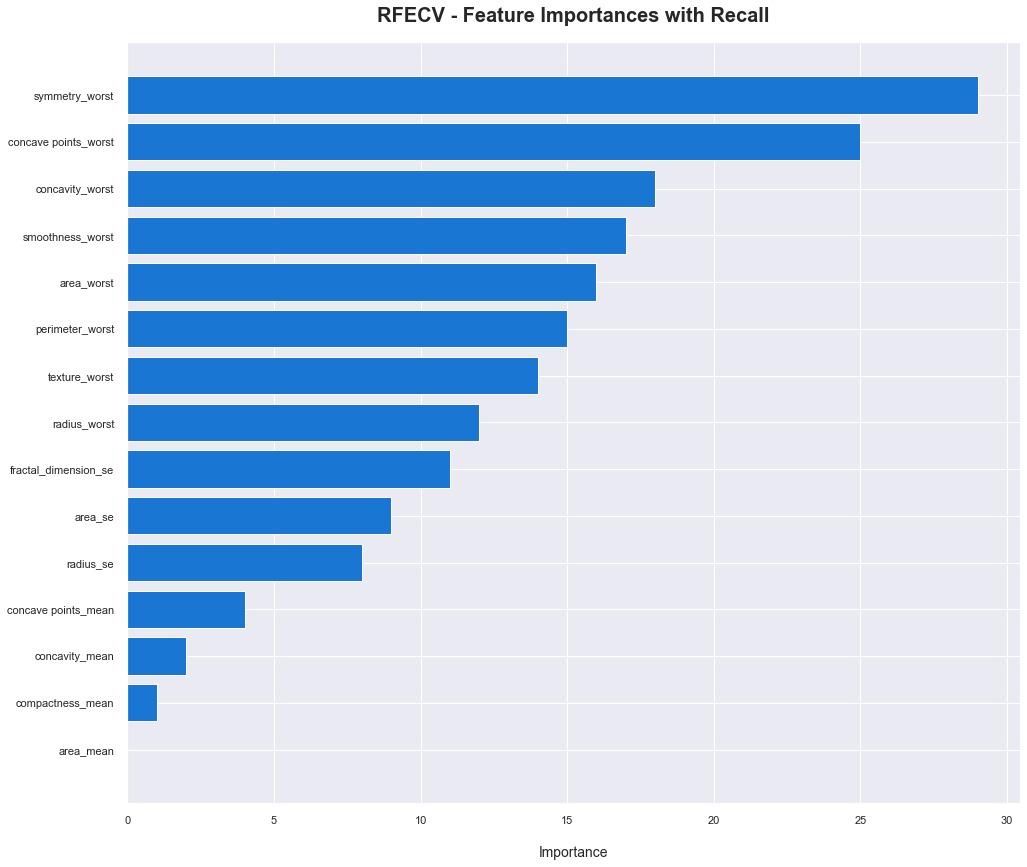

In [37]:
# Feature Importance for Logistic Regression using RFE and scoring = recall
print('Optimal number of features: {}'.format(selector.n_features_))
cols_of_interest = list(np.where(selector.support_ == False)[0])
print(cols_of_interest)
dset = pd.DataFrame()
dataset_dropped = dataset_copy.drop(dataset_copy.columns[cols_of_interest], axis=1)
dset['attr'] = dataset_dropped.columns
dset['importance'] = list(np.where(selector.ranking_ != 1)[0])
dset = dset.sort_values(by='importance', ascending=True)
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances with Recall', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [38]:
#cross validation on LR with recall
cross_val_metrics(CV_log_clf_1)

[accuracy] : 0.98069 (+/- 0.00654)
[precision] : 0.98582 (+/- 0.01159)
[recall] : 0.96224 (+/- 0.02426)


In [39]:
#cross validation on LR with recall & RFE
cross_val_metrics(selector)

[accuracy] : 0.96664 (+/- 0.01160)
[precision] : 0.97153 (+/- 0.02268)
[recall] : 0.93876 (+/- 0.02403)


In [40]:
#Voting Classifier
voting_clf = VotingClassifier (
        estimators = [('log1', CV_log_clf), ('log_2', CV_log_clf_1)],
                     voting='soft', weights = [1, 1])
    
voting_clf.fit(X_train,y_train)

y_pred = voting_clf.predict(X_test)
y_score = voting_clf.predict_proba(X_test)[:,1]

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
print('Confusion matrix : \n',cm)
plt.show()
show_evaluation_metrics()

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  63 out of  70 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.3s finished


Confusion matrix : 
 [[106   2]
 [  1  62]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.982
Precision =     0.969
Recall    =     0.984
F1_score  =     0.976


In [41]:
select_threshold_value(voting_clf,X_test)

Recall w/ threshold = 0.1 : 0.9841269841269841
Threshold = 0.1 

Confusion matrix : 
 [[97 11]
 [ 1 62]]
Recall w/ threshold = 0.2 : 0.9841269841269841
Threshold = 0.2 

Confusion matrix : 
 [[100   8]
 [  1  62]]
Recall w/ threshold = 0.3 : 0.9841269841269841
Threshold = 0.3 

Confusion matrix : 
 [[103   5]
 [  1  62]]
Recall w/ threshold = 0.4 : 0.9841269841269841
Threshold = 0.4 

Confusion matrix : 
 [[105   3]
 [  1  62]]
Recall w/ threshold = 0.5 : 0.9841269841269841
Threshold = 0.5 

Confusion matrix : 
 [[106   2]
 [  1  62]]
Recall w/ threshold = 0.6 : 0.9682539682539683
Threshold = 0.6 

Confusion matrix : 
 [[107   1]
 [  2  61]]
Recall w/ threshold = 0.7 : 0.9523809523809523
Threshold = 0.7 

Confusion matrix : 
 [[107   1]
 [  3  60]]
Recall w/ threshold = 0.8 : 0.9523809523809523
Threshold = 0.8 

Confusion matrix : 
 [[108   0]
 [  3  60]]
Recall w/ threshold = 0.9 : 0.9047619047619048
Threshold = 0.9 

Confusion matrix : 
 [[108   0]
 [  6  57]]


In [42]:
y_score = voting_clf.predict_proba(X_test)[:,1]>0.5

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
print('Confusion matrix : \n',cm)
plt.show()
show_evaluation_metrics()

Confusion matrix : 
 [[106   2]
 [  1  62]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.982
Precision =     0.969
Recall    =     0.984
F1_score  =     0.976


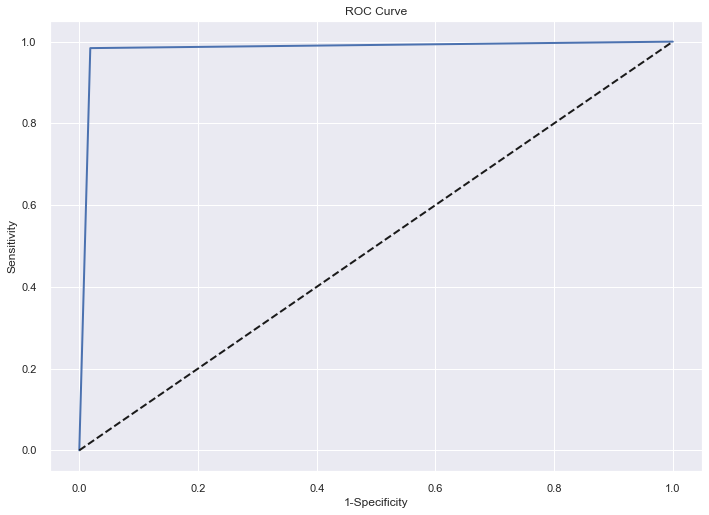

In [43]:
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

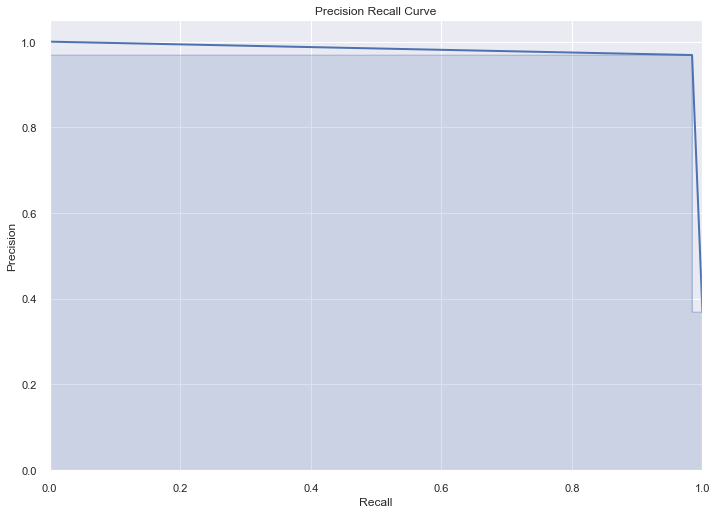

In [44]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plot_precision_recall()

Confusion matrix : 
 [[107   1]
 [  4  59]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.971
Precision =     0.983
Recall    =     0.937
F1_score  =     0.959


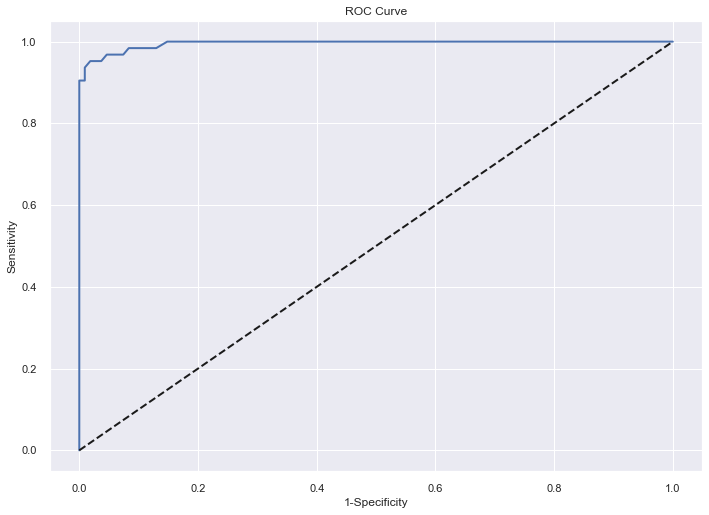

In [45]:
#Using RandomForestClassifier with folds = 5
CV_RF_cf = RandomForestClassifier(n_estimators = 100, criterion='entropy', random_state=0)
CV_RF_cf.fit(X_train,y_train)
y_pred = CV_RF_cf.predict(X_test)
y_score = CV_RF_cf.predict_proba(X_test)[:,1]


# Confusion maxtrix & metrics
cm = confusion_matrix(y_test, y_pred)
class_names = [0,1]
plt.figure()
print('Confusion matrix : \n',cm)
plt.show()

show_evaluation_metrics()

# ROC curve
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

In [46]:
select_threshold_value(CV_RF_cf,X_test)

Recall w/ threshold = 0.1 : 1.0
Threshold = 0.1 

Confusion matrix : 
 [[88 20]
 [ 0 63]]
Recall w/ threshold = 0.2 : 0.9841269841269841
Threshold = 0.2 

Confusion matrix : 
 [[96 12]
 [ 1 62]]
Recall w/ threshold = 0.3 : 0.9682539682539683
Threshold = 0.3 

Confusion matrix : 
 [[102   6]
 [  2  61]]
Recall w/ threshold = 0.4 : 0.9523809523809523
Threshold = 0.4 

Confusion matrix : 
 [[104   4]
 [  3  60]]
Recall w/ threshold = 0.5 : 0.9365079365079365
Threshold = 0.5 

Confusion matrix : 
 [[107   1]
 [  4  59]]
Recall w/ threshold = 0.6 : 0.9047619047619048
Threshold = 0.6 

Confusion matrix : 
 [[107   1]
 [  6  57]]
Recall w/ threshold = 0.7 : 0.9047619047619048
Threshold = 0.7 

Confusion matrix : 
 [[107   1]
 [  6  57]]
Recall w/ threshold = 0.8 : 0.873015873015873
Threshold = 0.8 

Confusion matrix : 
 [[108   0]
 [  8  55]]
Recall w/ threshold = 0.9 : 0.7936507936507936
Threshold = 0.9 

Confusion matrix : 
 [[108   0]
 [ 13  50]]


Confusion matrix : 
 [[107   1]
 [  4  59]]


<Figure size 842.4x595.44 with 0 Axes>

Accuracy  =     0.971
Precision =     0.983
Recall    =     0.937
F1_score  =     0.959


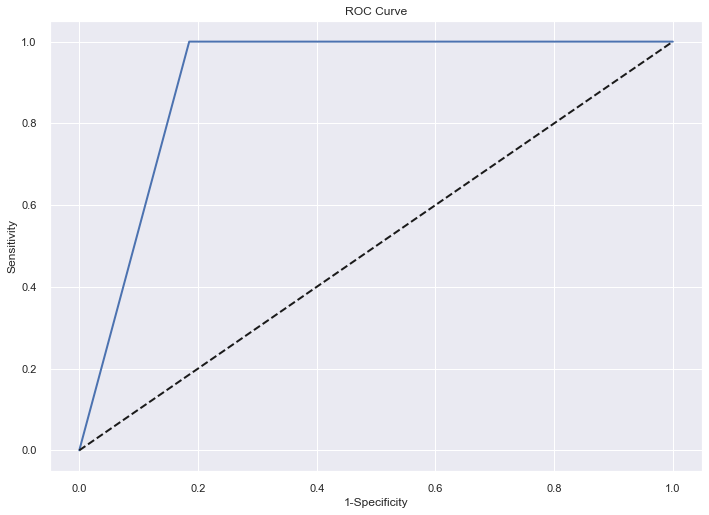

In [63]:
y_score = CV_RF_cf.predict_proba(X_test)[:,1]>0.1

# Confusion maxtrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
print('Confusion matrix : \n',cm)
plt.show()
show_evaluation_metrics()
fpr, tpr, t = roc_curve(y_test, y_score)
plot_roc()

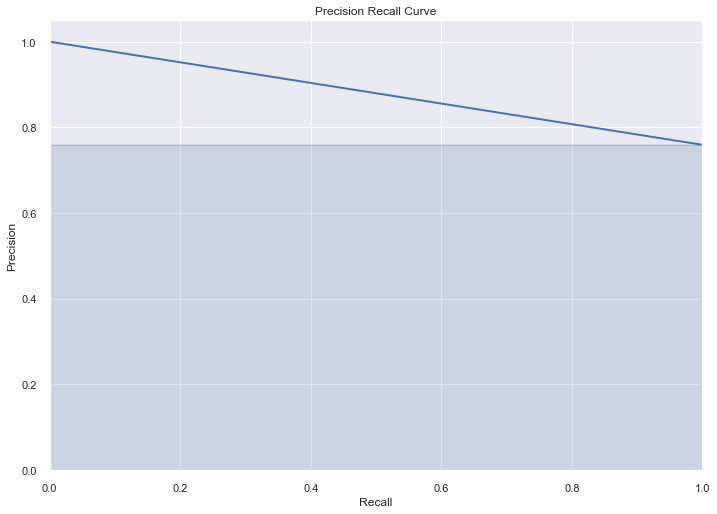

In [64]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
plot_precision_recall()